In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
#from sklearn.preprocessing import Imputer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# Chargement des données
dataset = pd.read_csv('./Fichiers de données/sms_spam_svm.csv')
print(dataset)

     type  suspect  neutral
0     ham        1        3
1     ham       49       30
2    spam       47       32
3     ham       46       31
4     ham        0       36
..    ...      ...      ...
145   ham       67       30
146   ham       63        2
147  spam        6       30
148   ham       62       34
149   ham        9       30

[150 rows x 3 columns]


In [60]:
# Conversion des étiquettes en valeurs numériques
#dataset['type'] = dataset['type'].map({'spam': -1, 'non-spam': 1})
dataset['type'] = dataset['type'].replace('spam', -1)
dataset['type'] = dataset['type'].replace('ham', 1)

/var/folders/gc/2sx1rc5d5zjc3mm7ynzgrf5c0000gn/T/ipykernel_17343/2701529748.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['type'] = dataset['type'].replace('ham', 1)


In [61]:
# Sélection des caractéristiques et des étiquettes
X = dataset[['suspect', 'neutral']]
y = dataset['type']

In [68]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#y_train = Imputer(strategy='mean').fit_transform(X_train)
#y_test = Imputer(strategy='mean').transform(X_test)

In [70]:
# Création d'un modèle de régression logistique
log_reg = SVC(kernel= 'linear', C=1.0, random_state=1)
# ramdom_state: Initialiser le generateur de nombre aleatoire interne du modèle 
# C: controle la marge d'erreur si c'est = à 1 alors la marge d'erreur est minimale

# Entraînement du modèle sur l'ensemble d'entraînement
log_reg.fit(X_train, y_train)

# Prédiction des étiquettes des échantillons de l'ensemble de test
y_pred = log_reg.predict(X_test)

In [81]:
# Calcul des métriques de performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Précision:", precision)
print("Récupération:", recall)
print("F1 Score:", f1)
print("Valeurs déclassifiées : ", (y_test != y_pred).sum())

Précision: 0.8333333333333334
Récupération: 1.0
F1 Score: 0.9090909090909091
Valeurs déclassifies :  5


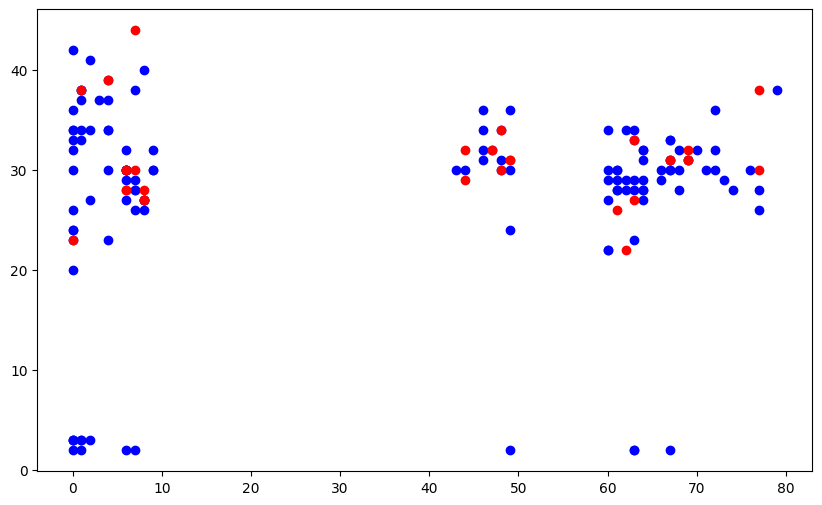

In [80]:
# Affichage des données et de la frontière de décision
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1].suspect, X[y == 1].neutral, color='b', label='non-spam')
plt.scatter(X[y == -1].suspect, X[y == -1].neutral, color='r', label='spam')

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


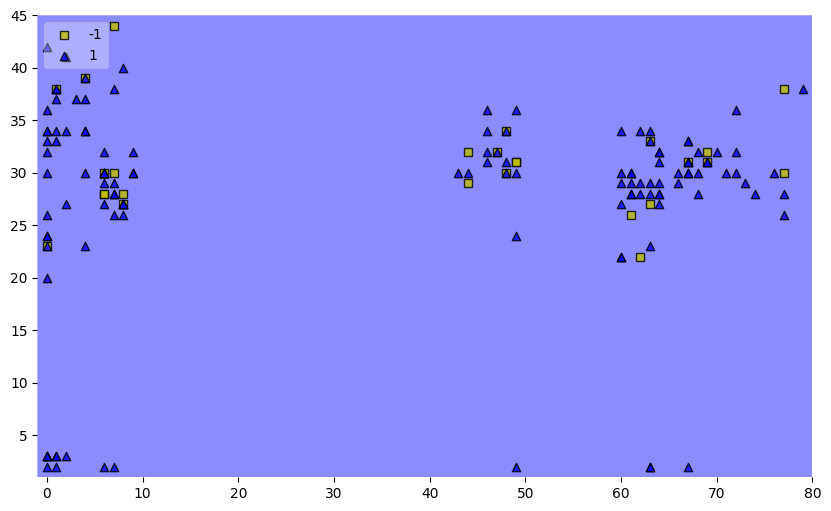

In [93]:
X_1 = np.vstack((X_train, X_test))
y_1 = np.hstack((y_train, y_test))

graphe = plt.figure(figsize=(10, 6))
graphe = plot_decision_regions(
    X=X_1, y=y_1,
    clf=log_reg,
    legend=2,
    colors='y,b',
)